<a href="https://colab.research.google.com/github/Sudhakaran-ns/python_MainProject/blob/main/TeleCommunicationChurnDataAnalysisAndPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Telecommunication Data Analysis and prediction**##

# **Initial EDA**

Importing required libraries to predict and analysis telecommunication data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

Reading the Raw Csv file from git hub

In [ ]:
# Reading the raw CSV file from github

data = pd.read_csv('https://raw.githubusercontent.com/Sudhakaran-ns/DataSetLists/refs/heads/main/TeleCommunicationData.csv')

# To display top 5 rows

data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99.0,16.78,244.7,91,11.01,10.0,3.0,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3.0,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5.0,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7.0,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122.0,12.61,186.9,121,8.41,10.1,3.0,2.73,3,False


In [ ]:
# To display all the column headers along with repective dataType

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2664 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2665 non-null   float64
 9   Total eve minutes       2664 non-null   float64
 10  Total eve calls         2663 non-null   float64
 11  Total eve charge        2665 non-null   float64
 12  Total night minutes     2663 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2663 non-null   

In [ ]:
# TO find missing value count on each column

data.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,2
Total day calls,0
Total day charge,1
Total eve minutes,2


In [ ]:
# TO replace all the missing values in the current column to median and mode value

for col in data.select_dtypes(include=['int64', 'float64']).columns:
    if data[col].isnull().any():
        data[col].fillna(data[col].median(), inplace=True)
for col in data.select_dtypes(include=['object']).columns:
    if data[col].isnull().any():
        data[col].fillna(data[col].mode()[0], inplace=True)

/tmp/ipython-input-684951508.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [ ]:
# To verify the count of non-null values in each column after successfully filling missing data

data.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [ ]:
# To display descriptive statistics for the input data

data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.475244,100.310203,30.509216,200.413016,100.027007,17.033068,201.222993,100.106152,9.052397,10.237022,4.466617,2.763886,1.562641
std,39.563974,42.521018,13.612277,54.205240,19.988162,9.214238,50.932898,20.160389,4.330864,50.746637,19.418459,2.284176,2.788349,2.456185,0.752485,1.311236
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.400000,87.000000,24.380000,165.325000,87.000000,14.050000,167.100000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.950000,101.000000,30.580000,200.900000,100.000000,17.080000,201.200000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.900000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.637500,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.800000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Outlier detection and removal


**Box plots before removing Outlier**




Generating Box Plots Before Outlier Removal...


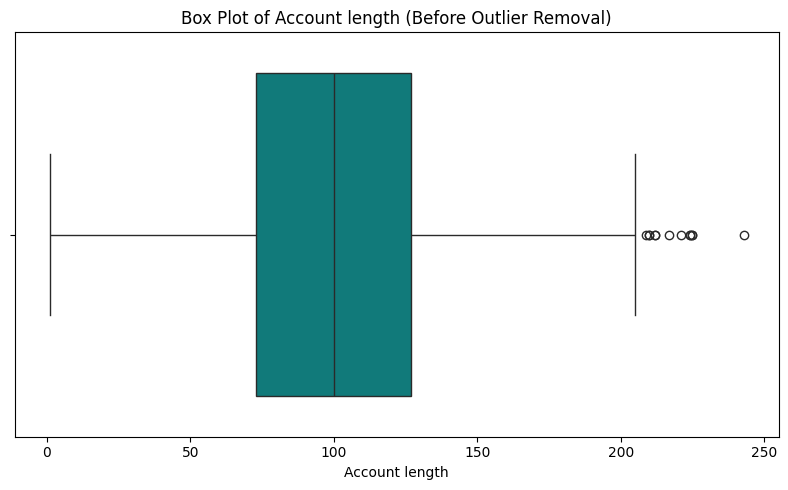

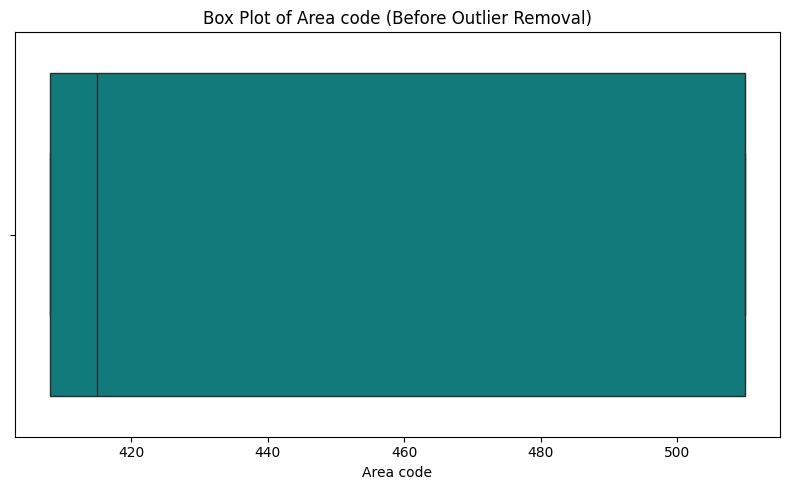

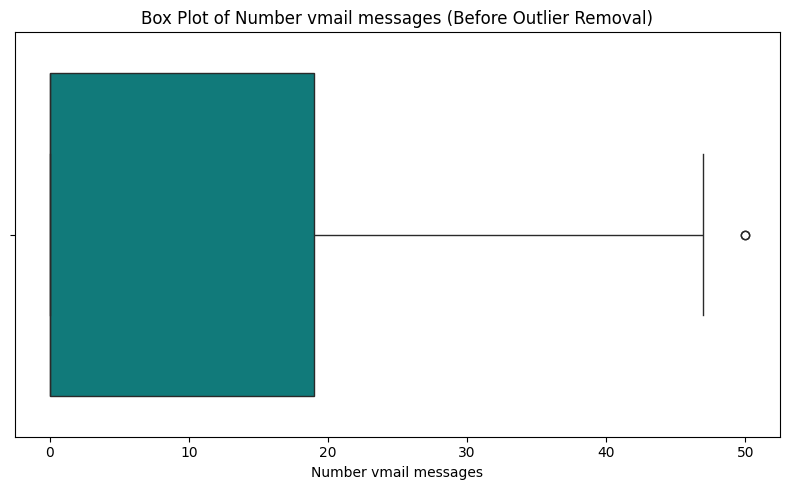

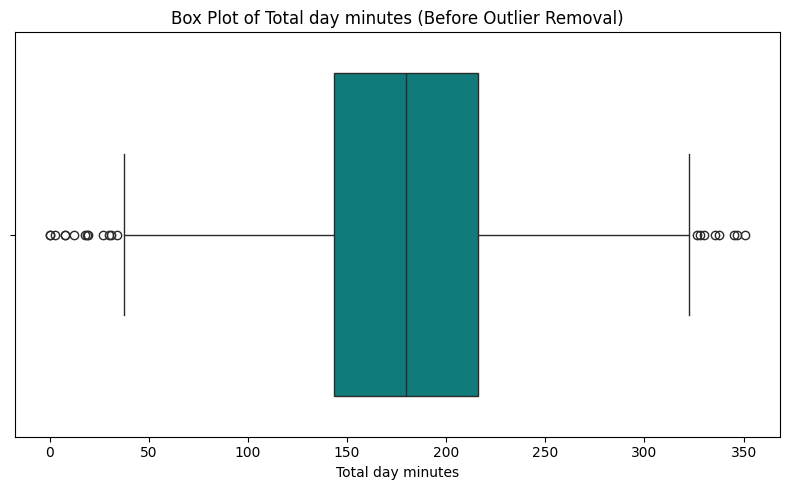

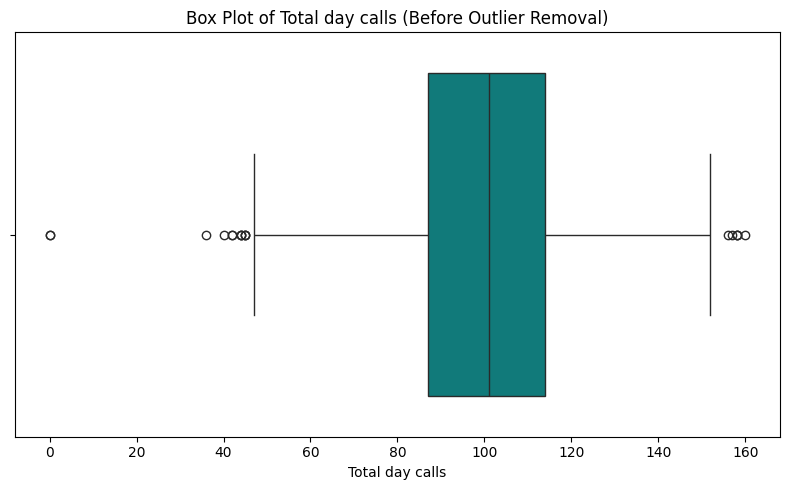

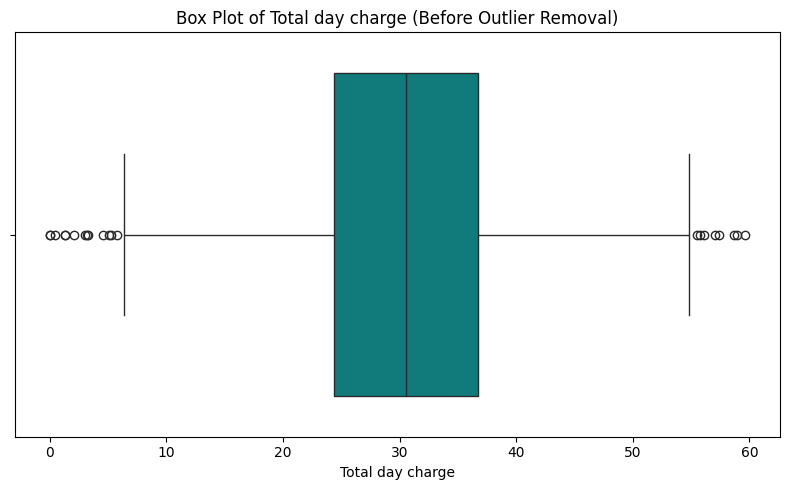

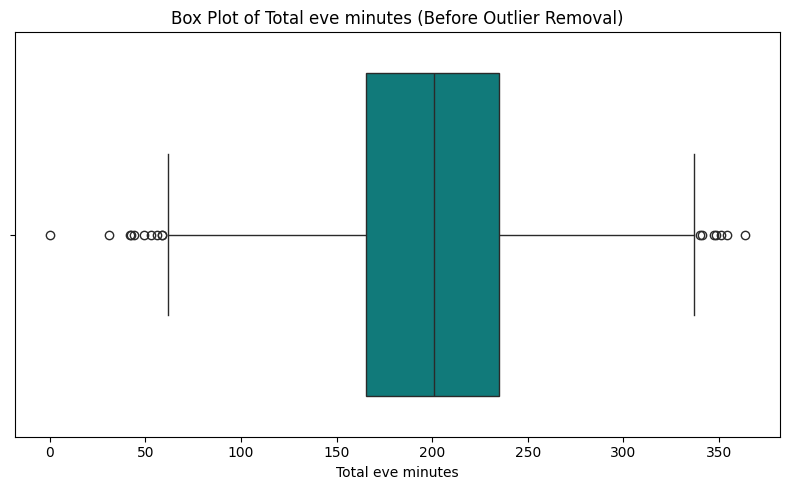

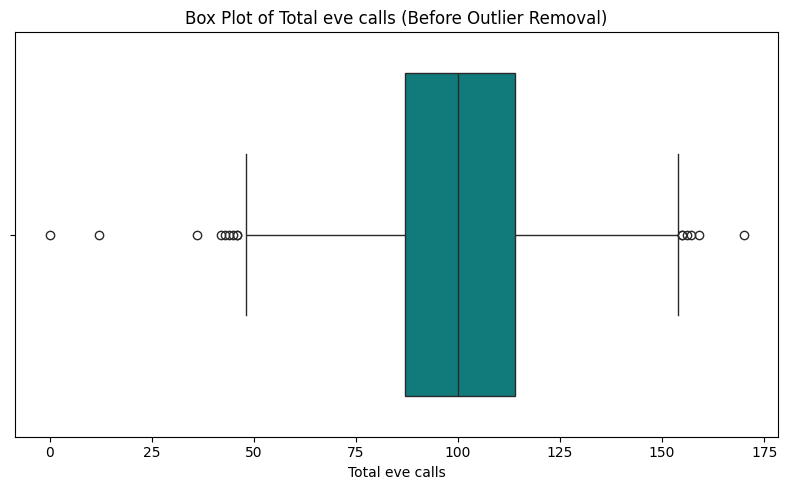

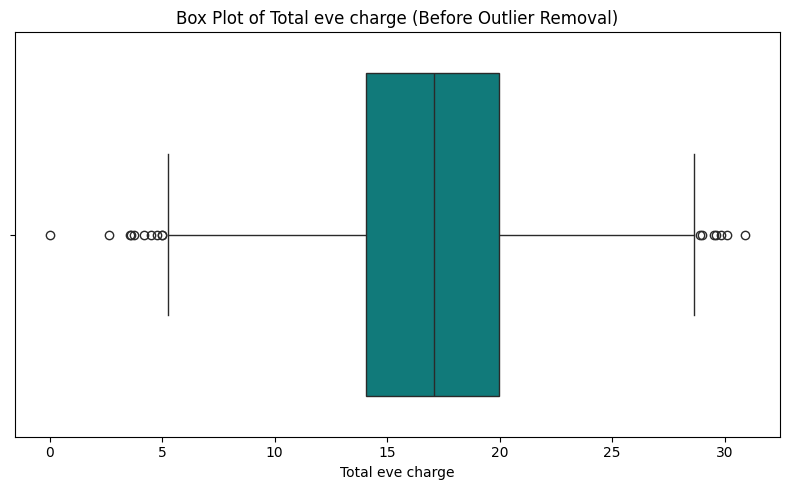

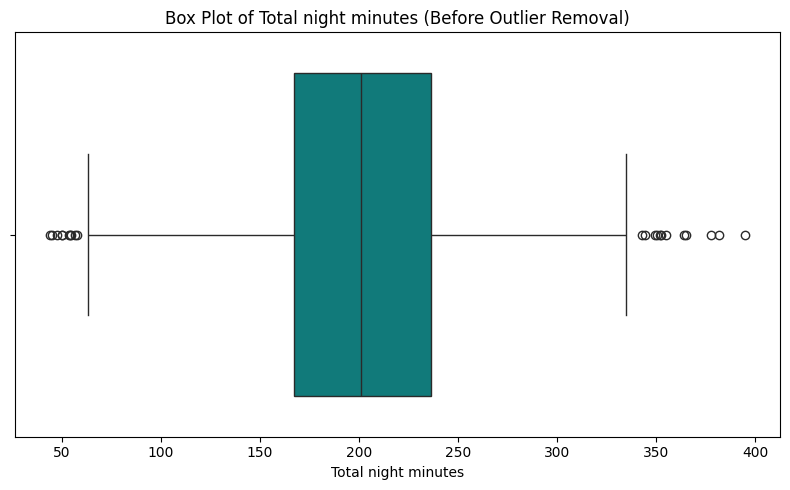

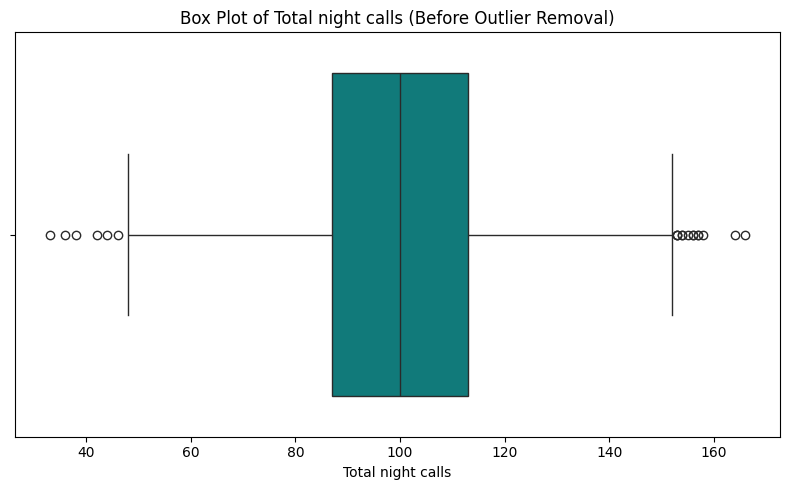

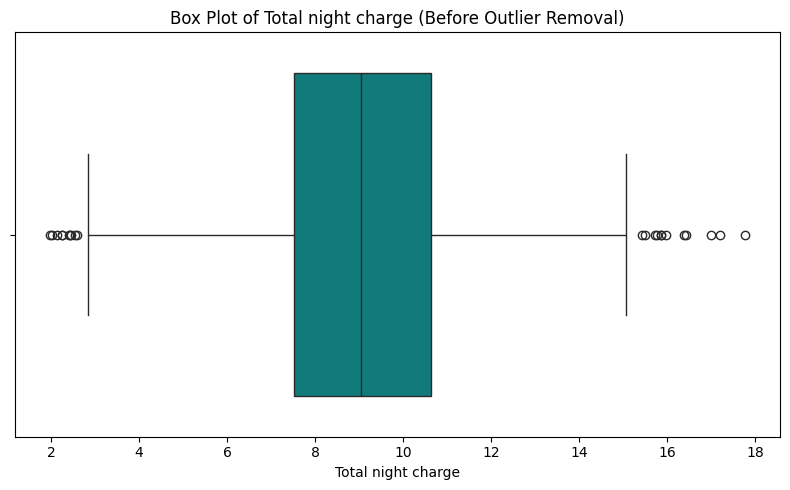

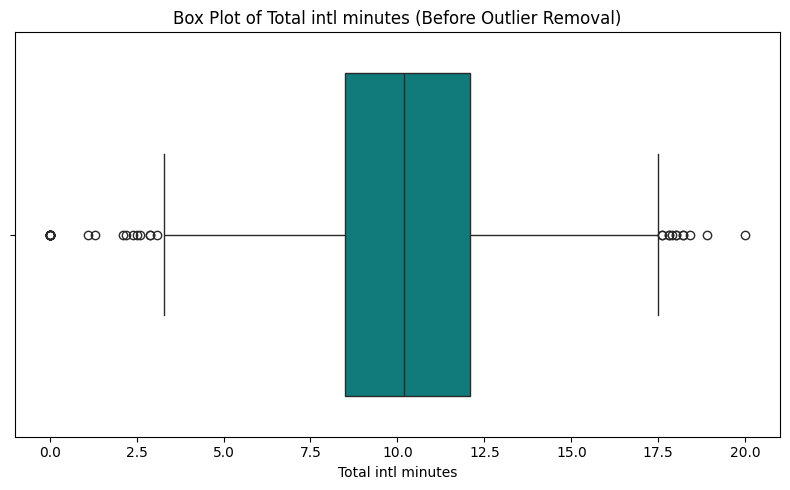

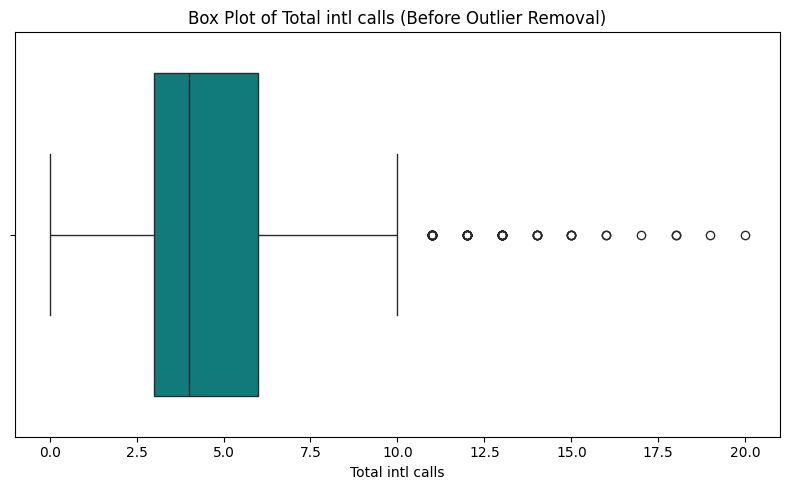

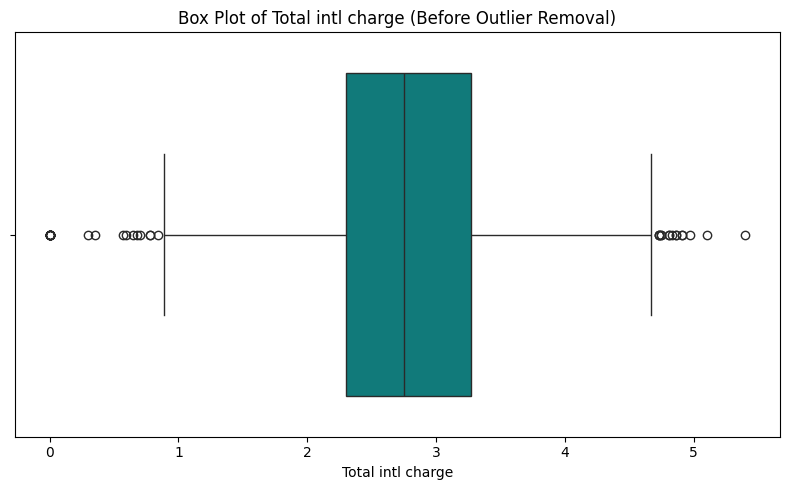

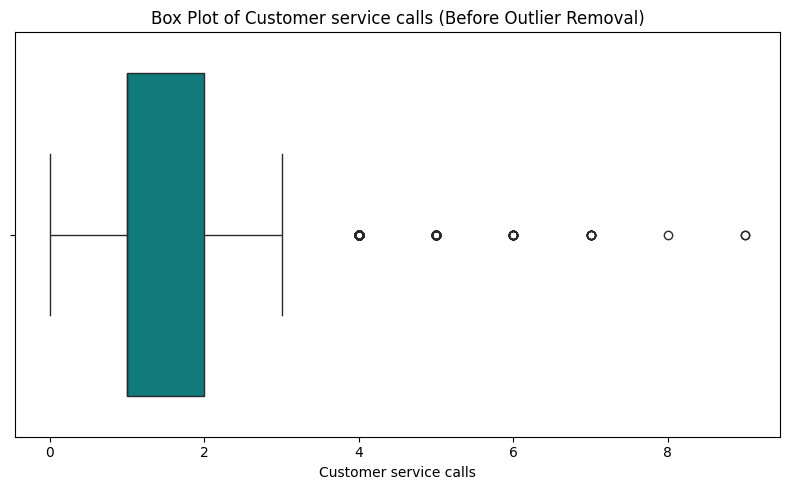

Original data shape: (2666, 20)
Cleaned data shape: (2246, 20)


In [ ]:
numerical_cols = data.select_dtypes(include=np.number).columns
print("Generating Box Plots Before Outlier Removal...")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col], color='darkcyan')
    plt.title(f'Box Plot of {col} (Before Outlier Removal)')
    plt.tight_layout()
    plt.show()

Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = ((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).any(axis=1)
data_cleaned = data[~outlier_mask].copy()

print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")



**Box plots after removing Outlier**





Generating Box Plots After Outlier Removal...


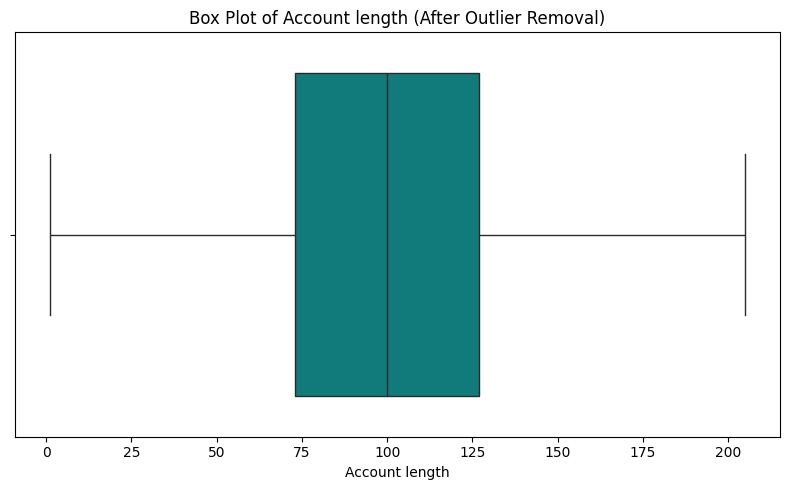

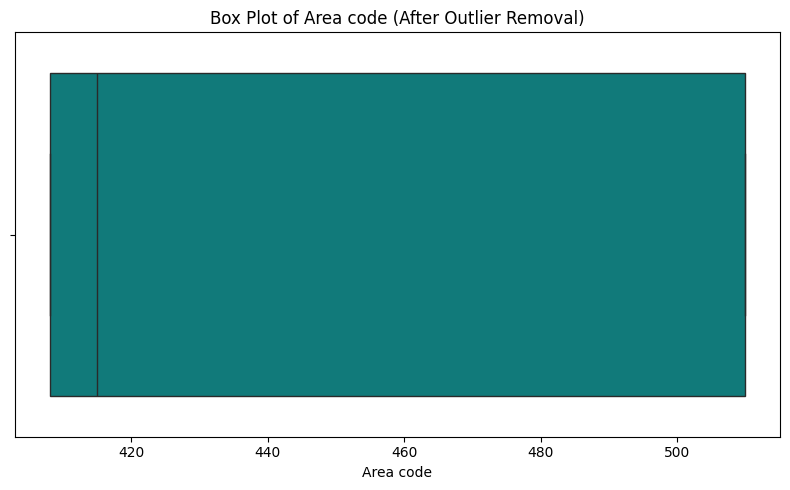

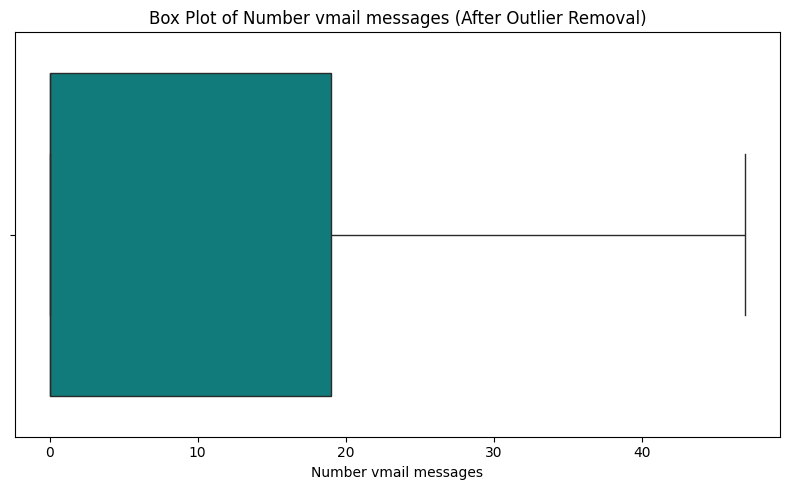

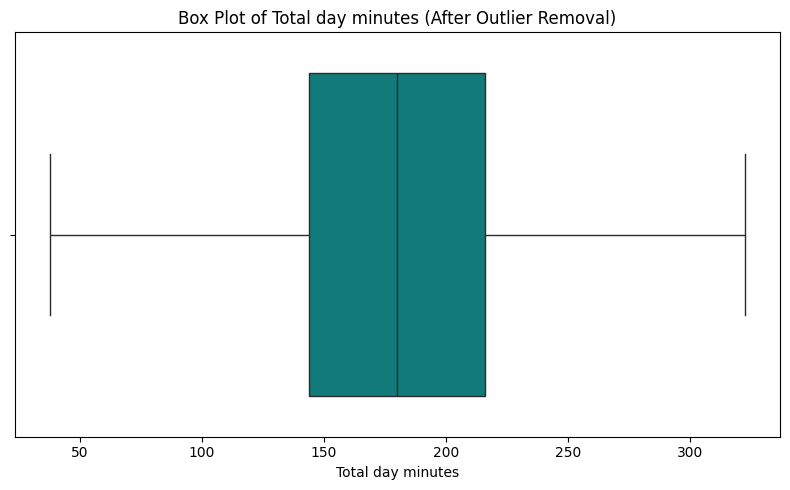

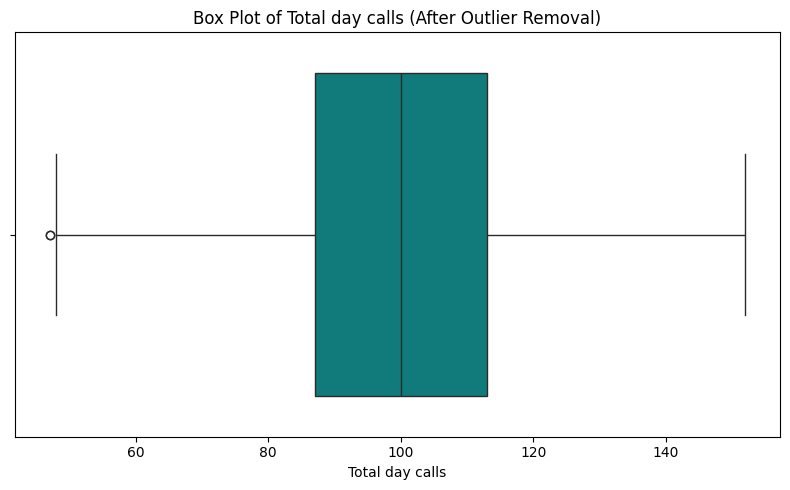

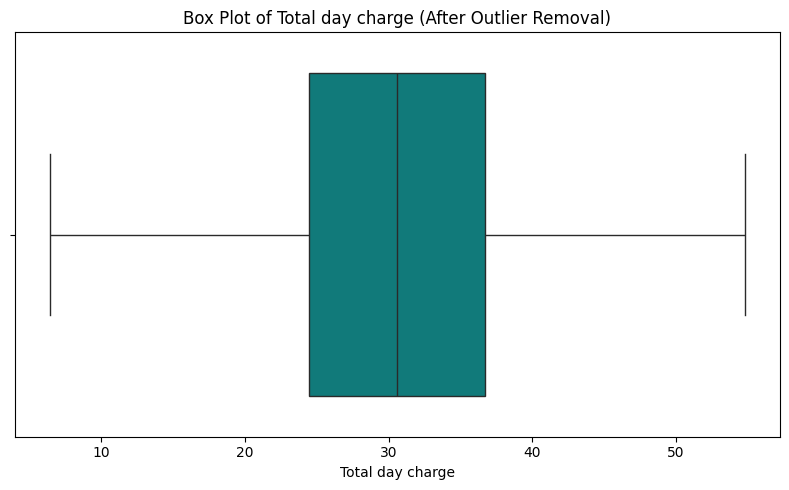

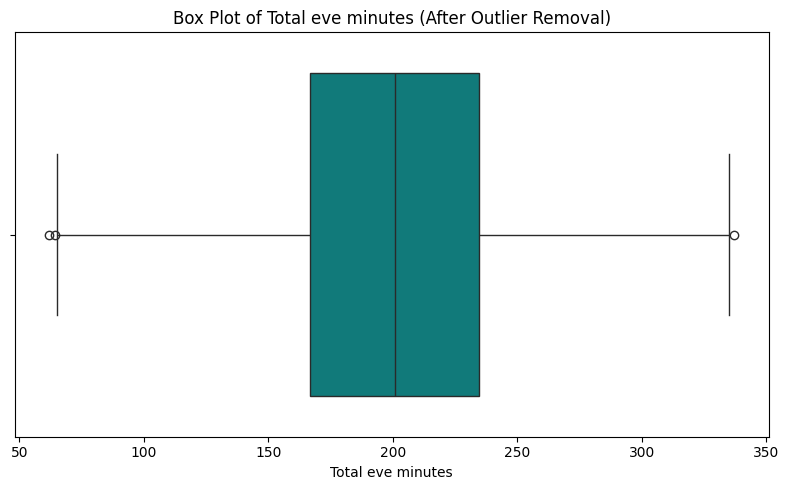

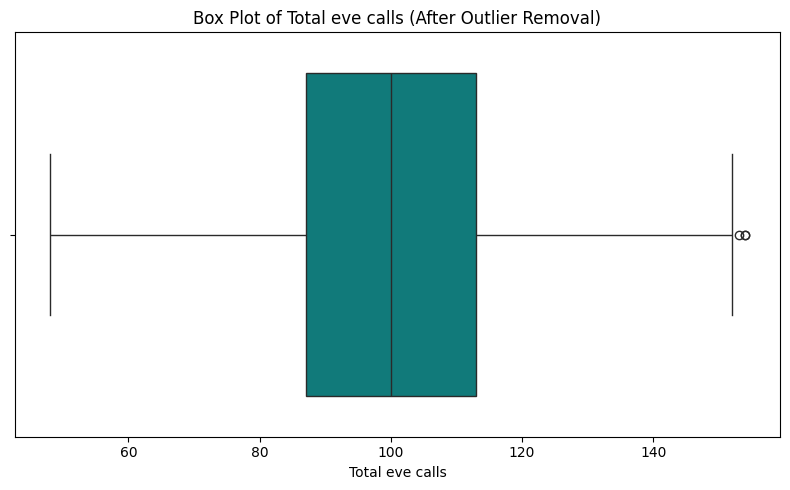

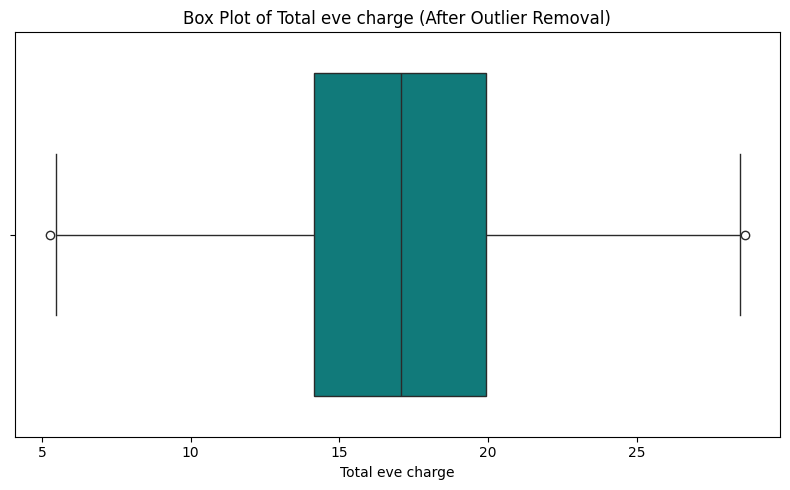

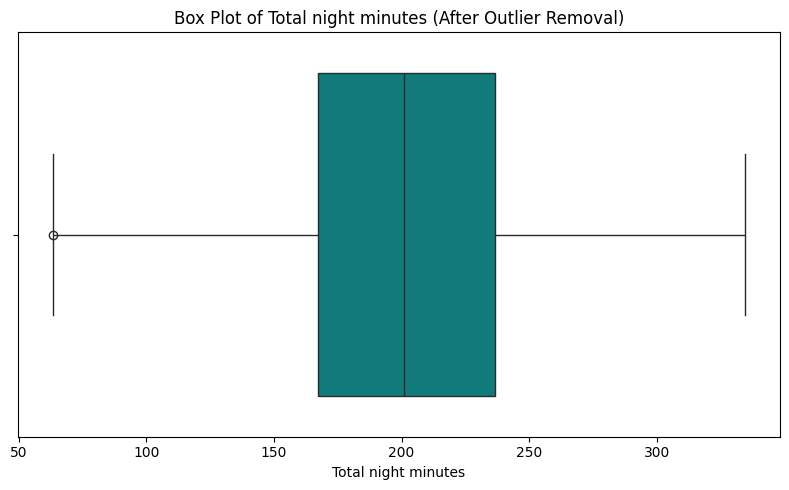

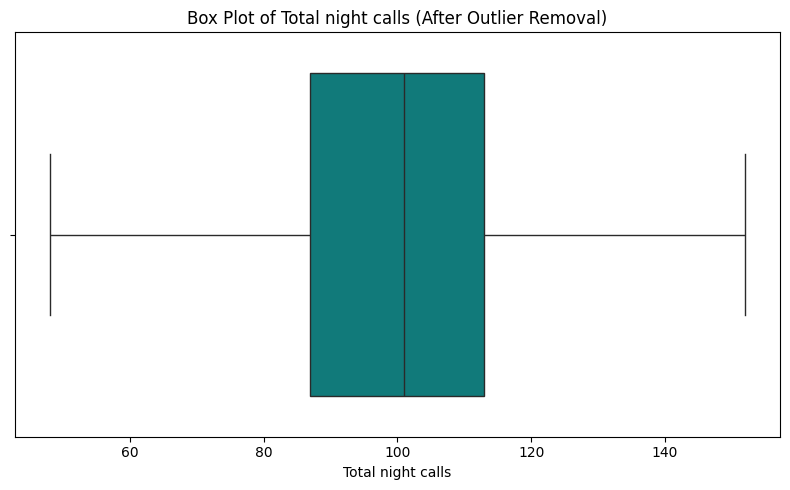

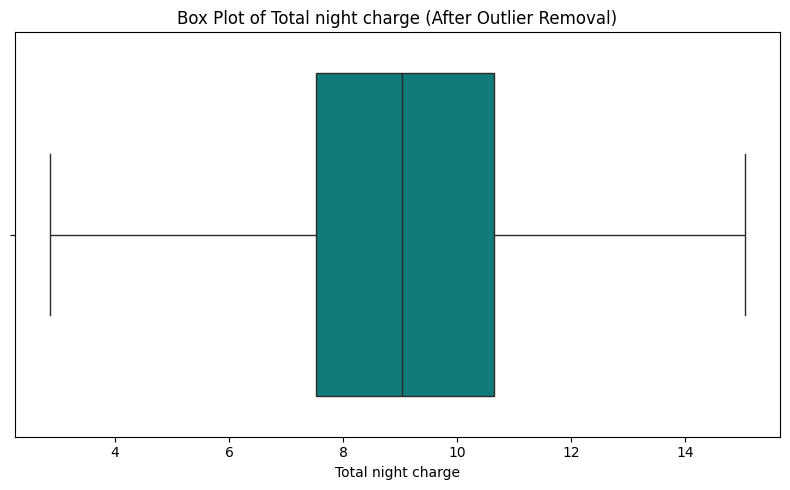

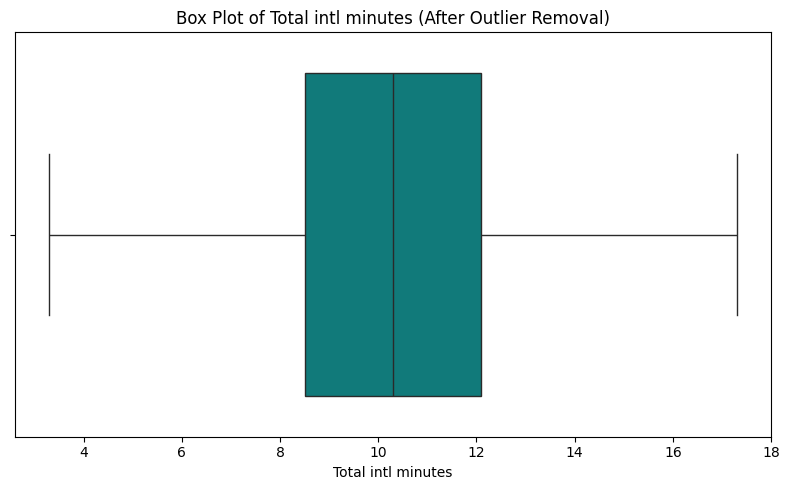

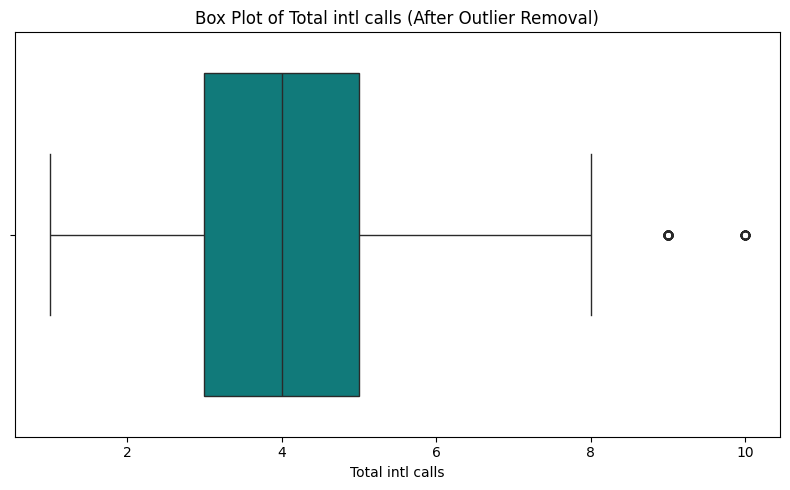

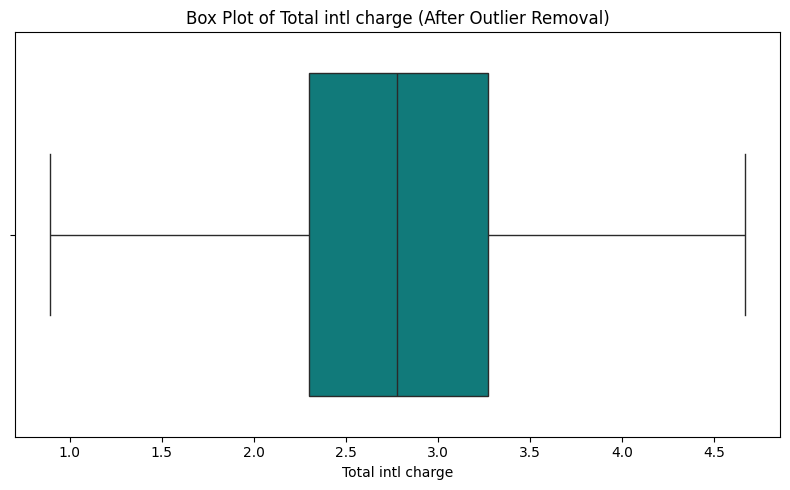

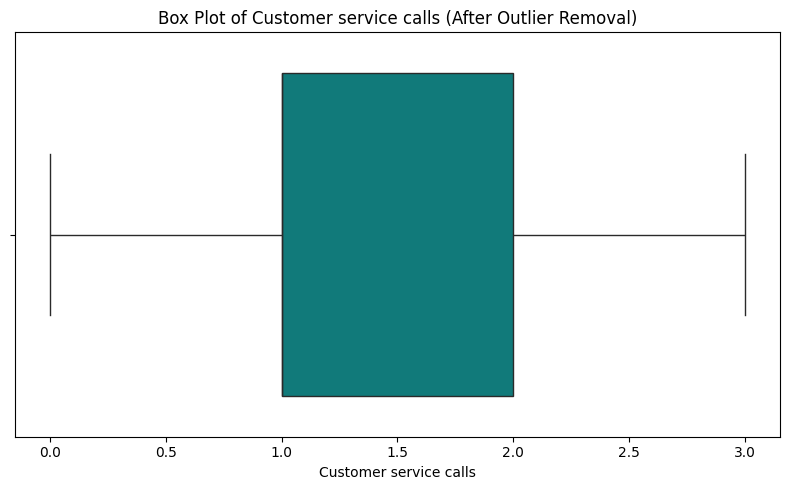

In [ ]:
print("\nGenerating Box Plots After Outlier Removal...")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data_cleaned[col], color='darkcyan')
    plt.title(f'Box Plot of {col} (After Outlier Removal)')
    plt.tight_layout()
    plt.show()

## Skewness check and transformation


In [ ]:
skewness_before = data_cleaned[numerical_cols].skew()
print("Skewness before transformation:")
print(skewness_before)
skewness_threshold = 0.5
for col in numerical_cols:
    if abs(data_cleaned[col].skew()) > skewness_threshold:
        data_cleaned[col] = np.log1p(data_cleaned[col])
skewness_after = data_cleaned[numerical_cols].skew()
print("\nSkewness after transformation:")
print(skewness_after)

Skewness before transformation:
Account length            0.003690
Area code                 1.095185
Number vmail messages     1.259170
Total day minutes        -0.016983
Total day calls           0.003662
Total day charge         -0.016394
Total eve minutes         0.032164
Total eve calls           0.021885
Total eve charge          0.032796
Total night minutes      -0.028672
Total night calls        -0.053163
Total night charge       -0.027467
Total intl minutes       -0.027505
Total intl calls          0.694345
Total intl charge        -0.026648
Customer service calls    0.277146
dtype: float64

Skewness after transformation:
Account length            0.003690
Area code                 1.091322
Number vmail messages     1.032110
Total day minutes        -0.016983
Total day calls           0.003662
Total day charge         -0.016394
Total eve minutes         0.032164
Total eve calls           0.021885
Total eve charge          0.032796
Total night minutes      -0.028672
Total night

##**Data visualizations**##


**1.   Histograms for numerical columns**



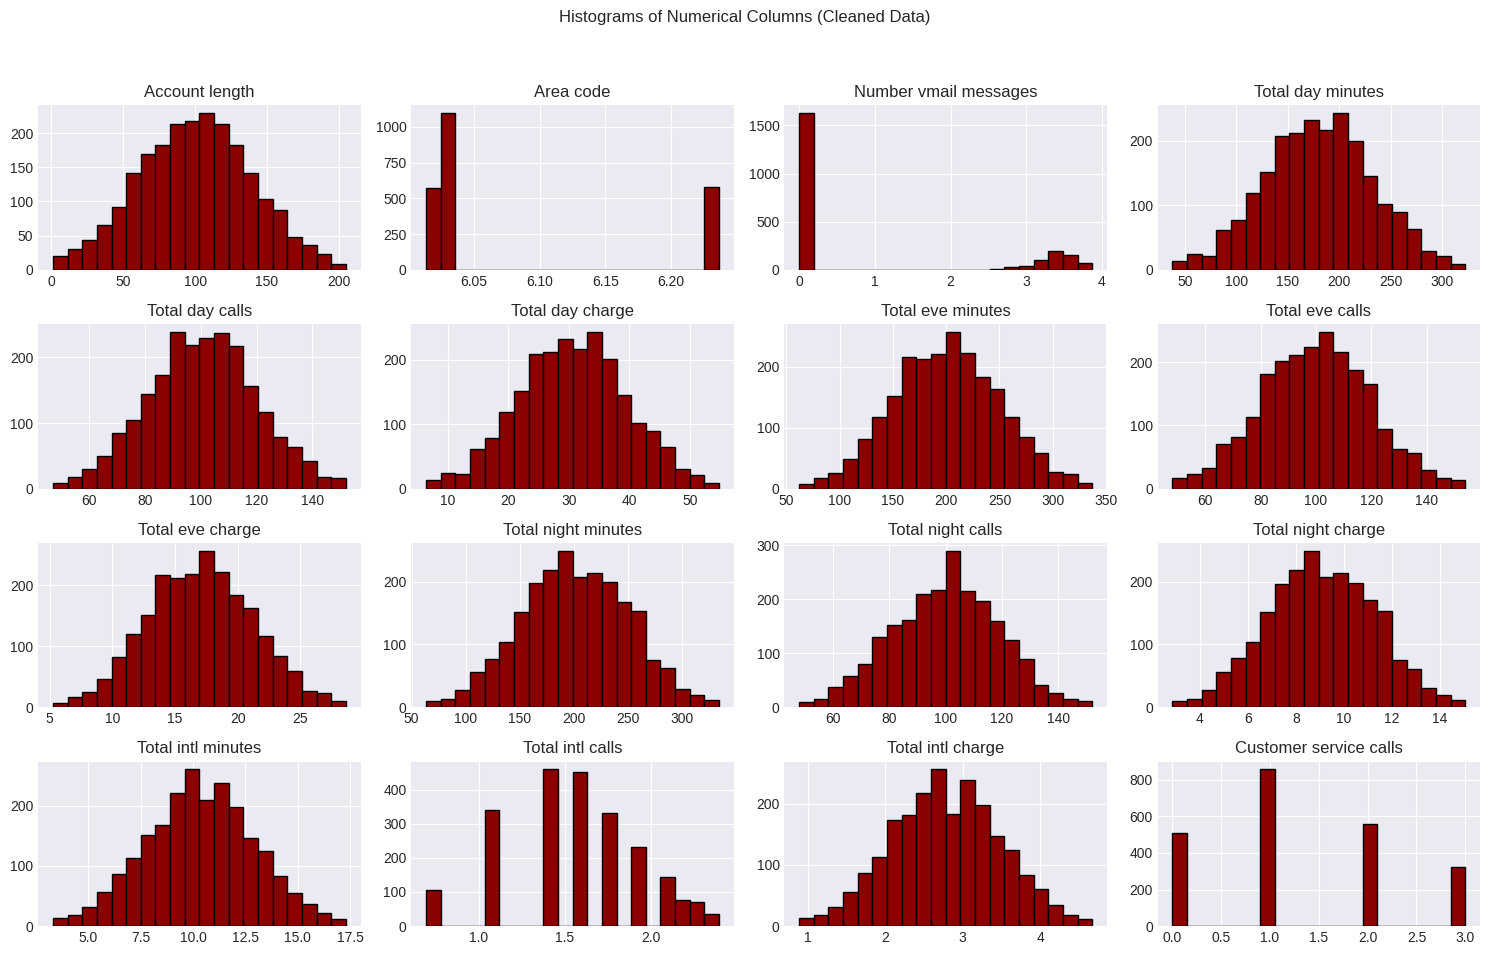

In [ ]:
numerical_cols_cleaned = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
plt.style.use('seaborn-v0_8-darkgrid')
data_cleaned[numerical_cols_cleaned].hist(figsize=(15, 10), bins=20, color='darkred', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns (Cleaned Data)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

*   The histograms above visualize the distribution of the numerical features in the cleaned dataset.

* These plots help understand the central tendency, spread, and shape of the data for each numerical column after removing outliers and applying transformations.




**2.   Count plots for categorical columns**



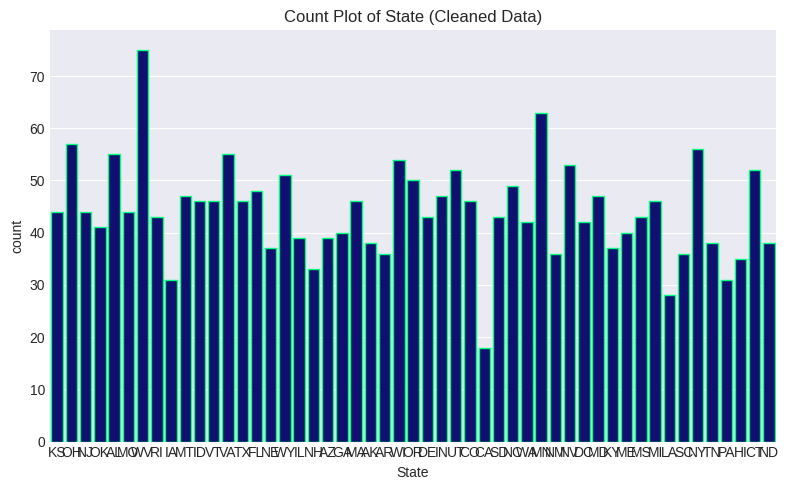

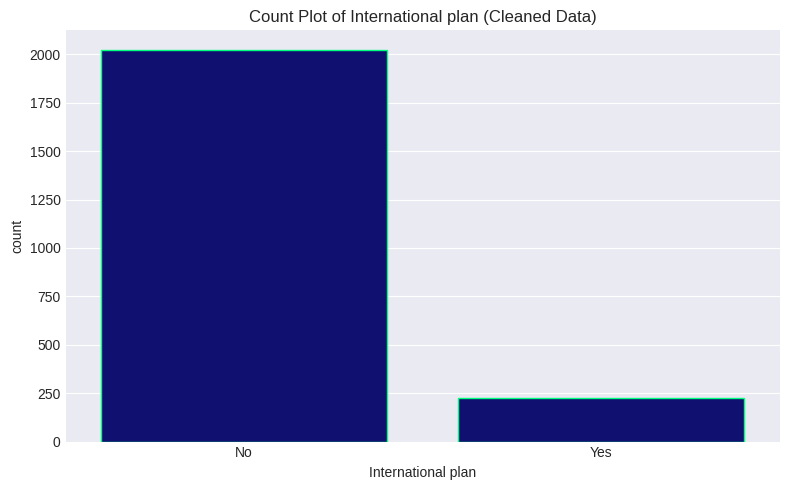

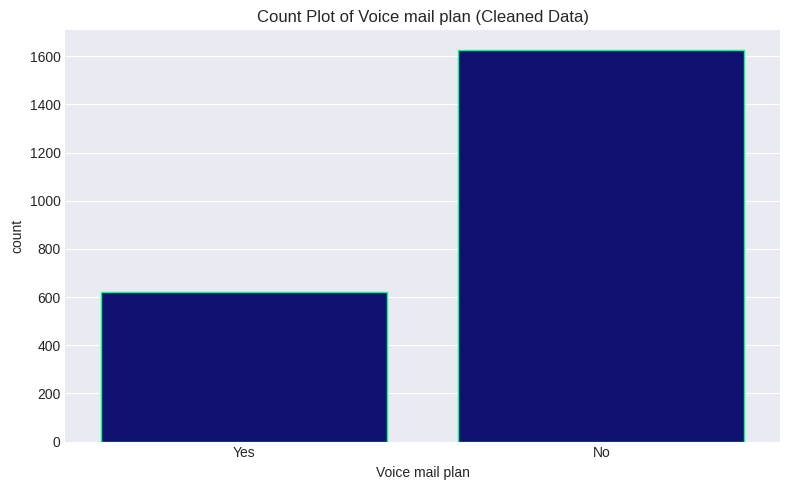

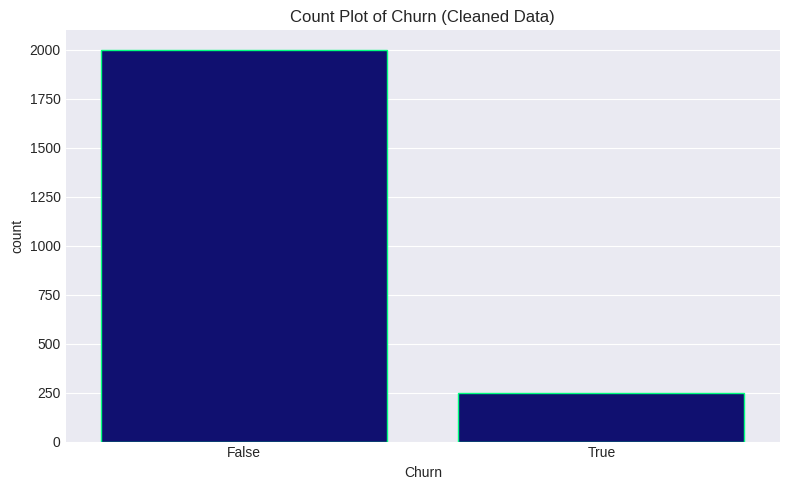

In [ ]:
 categorical_cols_cleaned = data_cleaned.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols_cleaned:
    plt.figure(figsize=(8, 5))
    plt.style.use('seaborn-v0_8-darkgrid')
    sns.countplot(x=col, data=data_cleaned, color='navy', edgecolor='springgreen')
    plt.title(f'Count Plot of {col} (Cleaned Data)')
    plt.tight_layout()
    plt.show()

These count plots visualize the frequency distribution of each categorical feature in the cleaned dataset.

*   Each plot represents a different categorical column.
*   The bars show the number of occurrences for each unique value within that category.
*   These plots help in understanding the distribution and balance of categories in the dataset.

**3.   Box plots for numerical columns grouped by Churn**



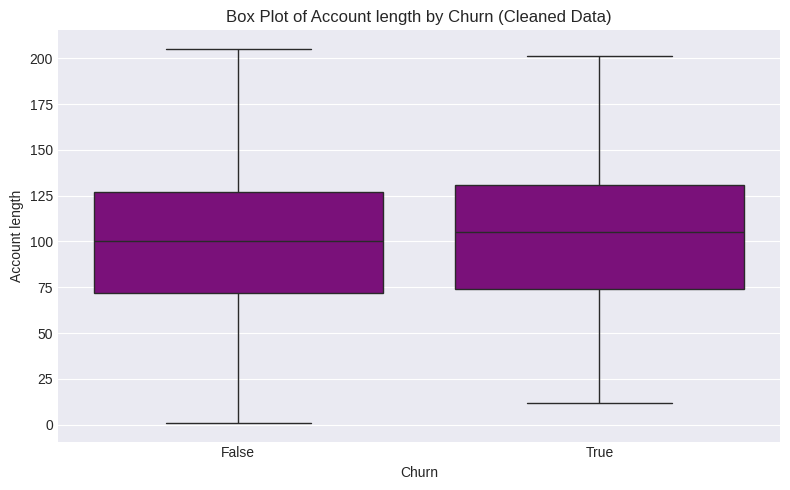

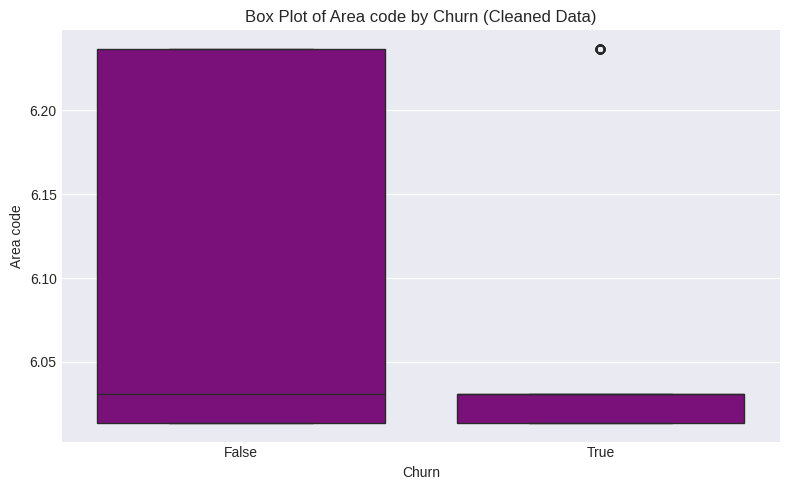

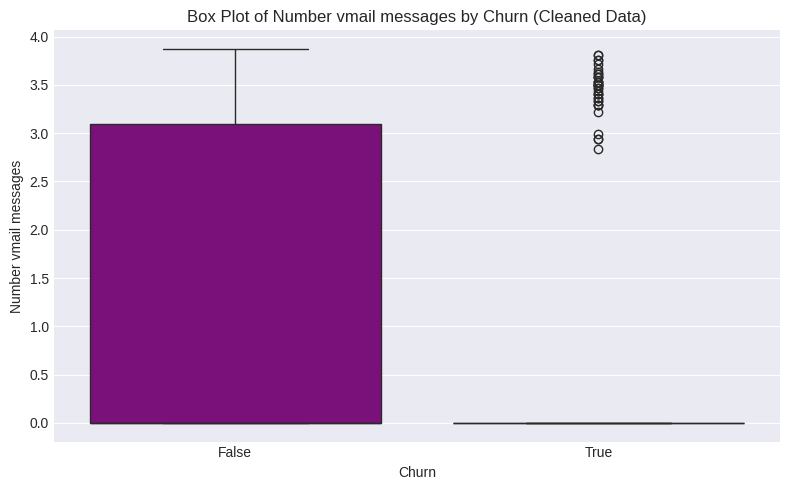

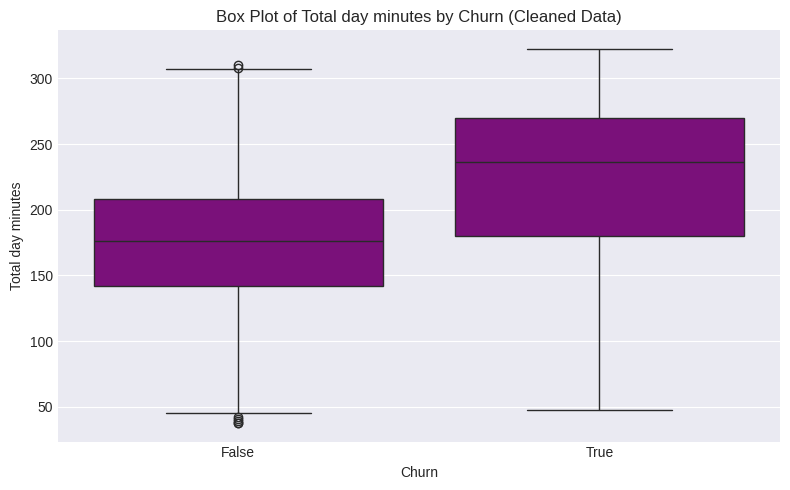

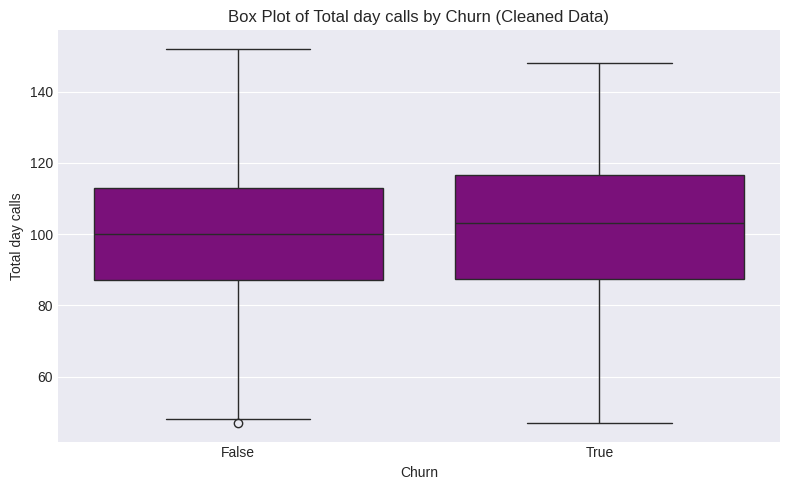

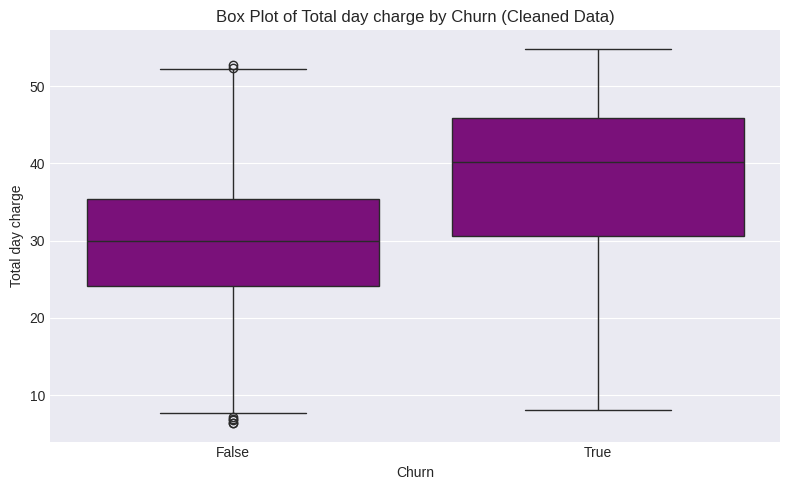

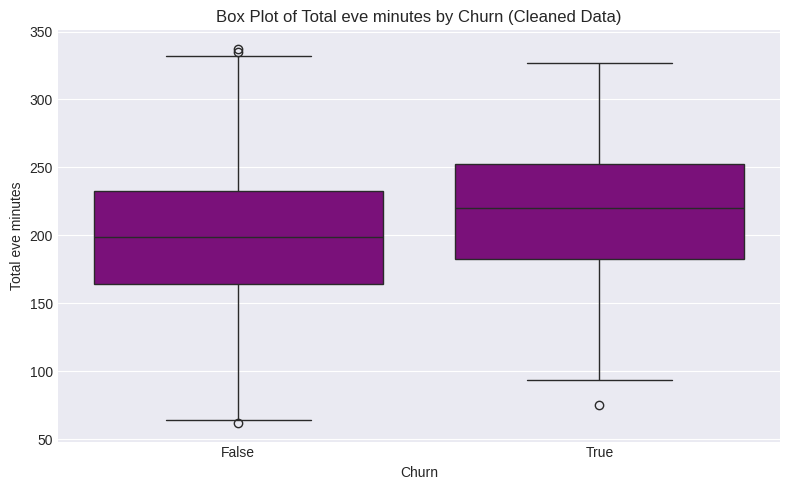

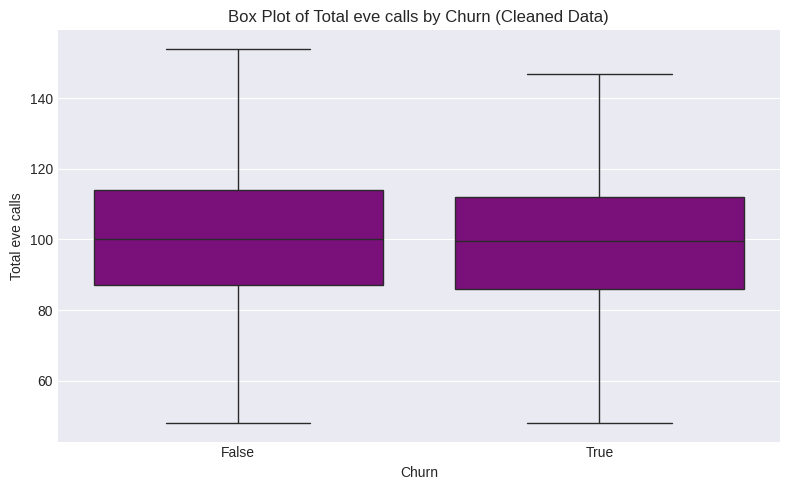

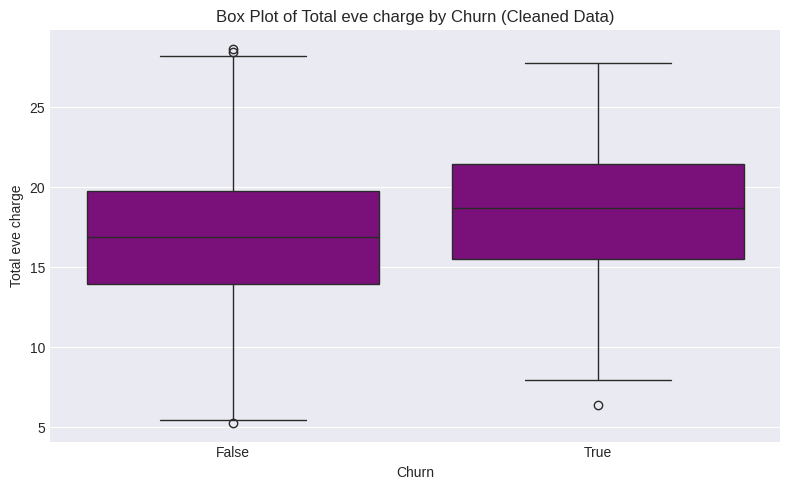

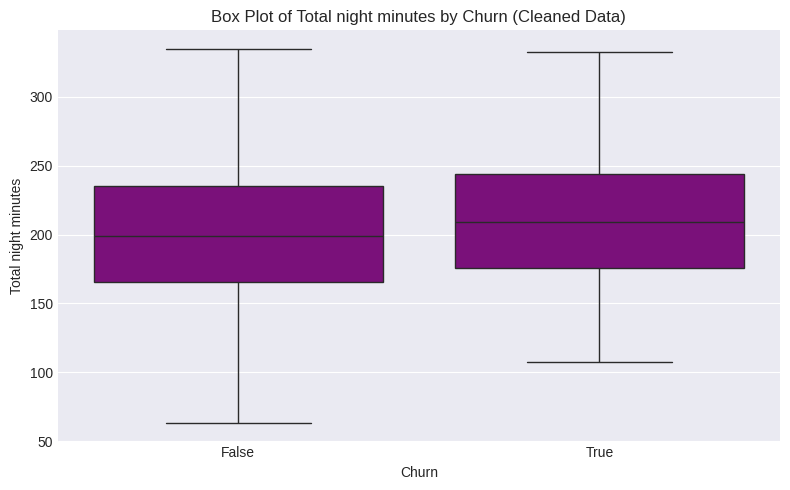

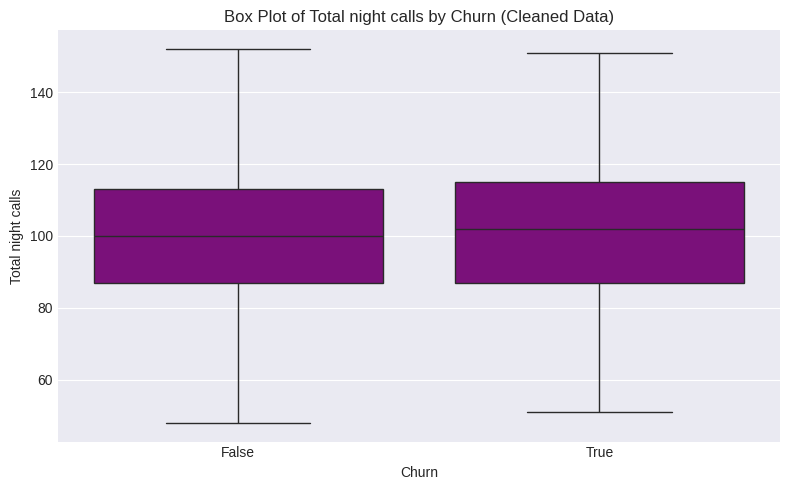

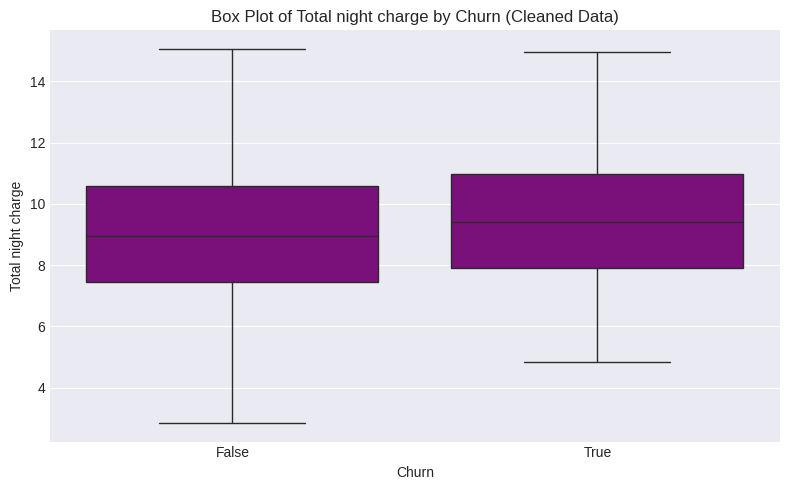

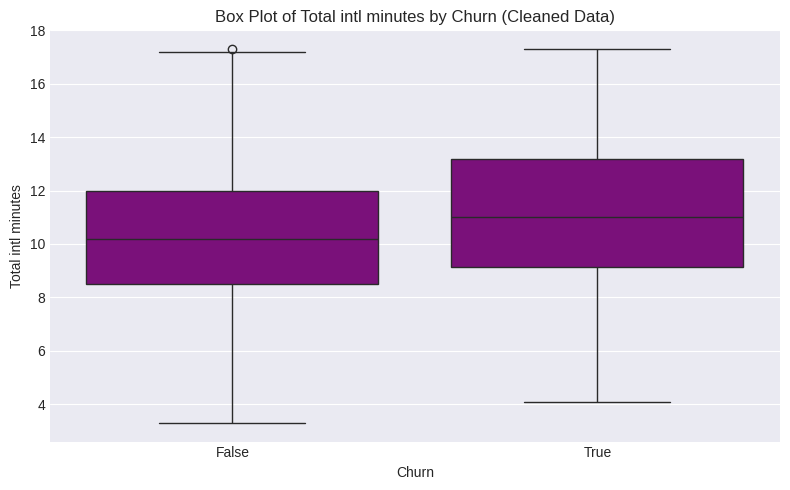

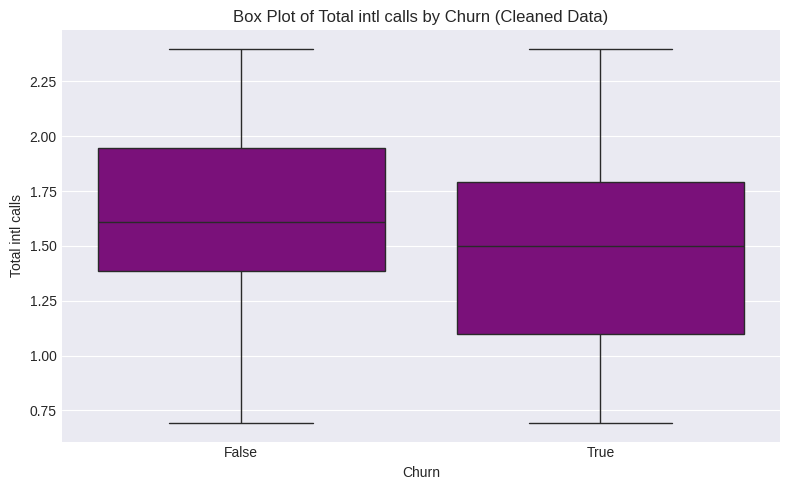

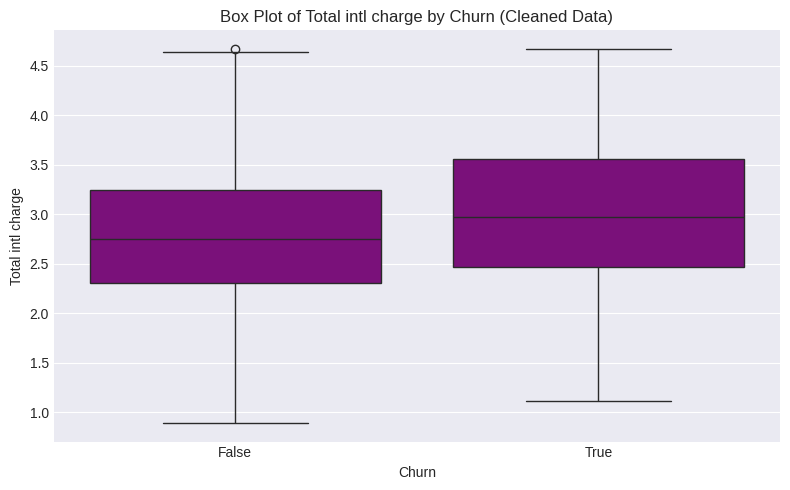

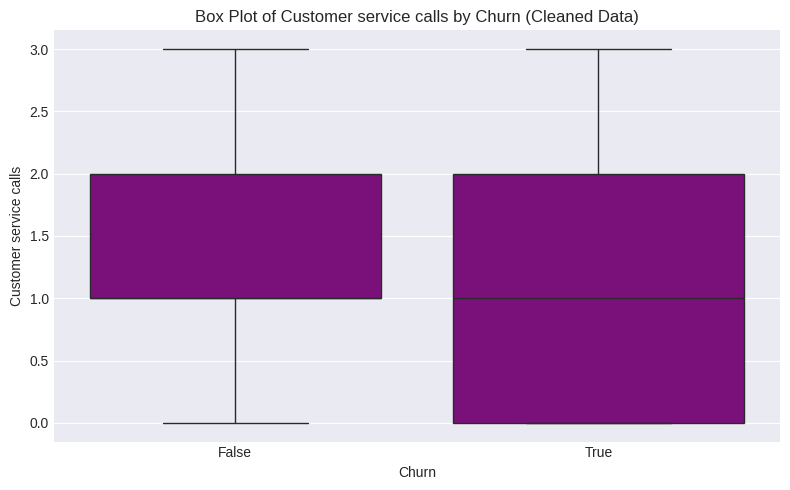

In [ ]:
for col in numerical_cols_cleaned:
    plt.figure(figsize=(8, 5))
    plt.style.use('seaborn-v0_8-darkgrid')
    sns.boxplot(x='Churn', y=col, data=data_cleaned, color='darkmagenta')
    plt.title(f'Box Plot of {col} by Churn (Cleaned Data)')
    plt.tight_layout()
    plt.show()

These box plots illustrate the distribution of numerical features for each churn category (True or False) in the cleaned dataset.

*   Each box plot represents a different numerical column.
*   The box shows the interquartile range (IQR), with the median marked by a line.
*   The "whiskers" extend to the minimum and maximum values within 1.5 times the IQR.
*   Points outside the whiskers are considered potential outliers.
*   These plots are useful for comparing the spread and central tendency of a numerical variable across different groups, in this case, churned vs. non-churned customers.

**4.   Count plots for categorical columns with Churn hue**




Generating Count Plots for Categorical Features with Churn Hue (Cleaned Data)...


/tmp/ipython-input-3947180537.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lawngreen'` for the same effect.

  sns.countplot(data=data_cleaned, x=col, hue='Churn', color='lawngreen' )


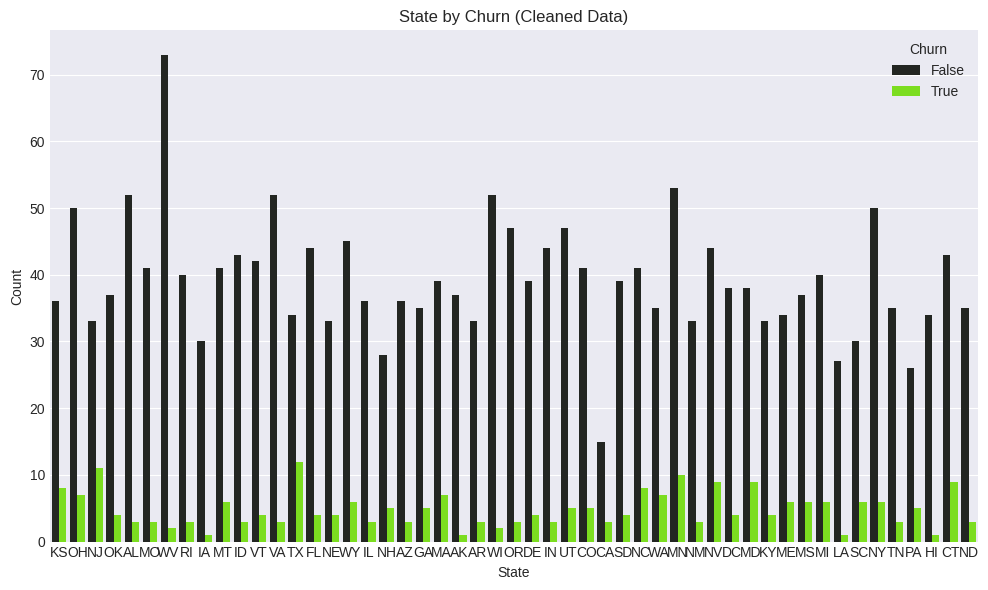

/tmp/ipython-input-3947180537.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lawngreen'` for the same effect.

  sns.countplot(data=data_cleaned, x=col, hue='Churn', color='lawngreen' )


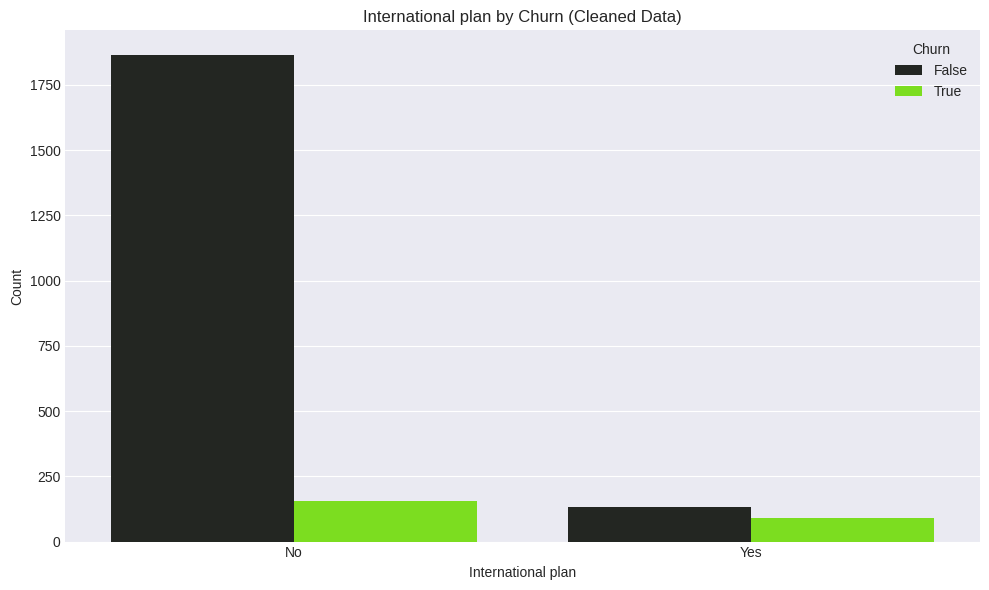

/tmp/ipython-input-3947180537.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:lawngreen'` for the same effect.

  sns.countplot(data=data_cleaned, x=col, hue='Churn', color='lawngreen' )


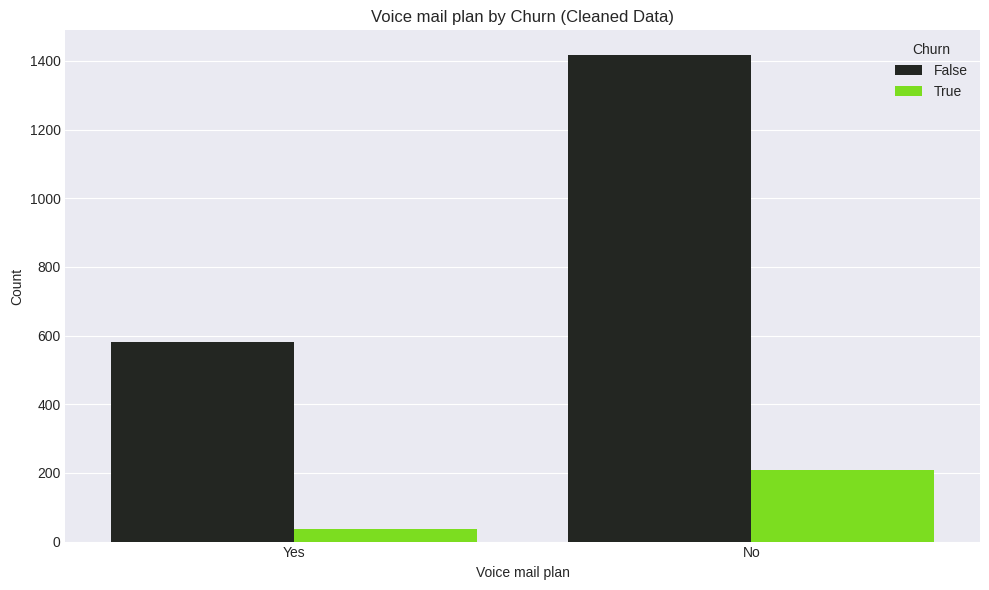

In [ ]:

print("Generating Count Plots for Categorical Features with Churn Hue (Cleaned Data)...")
for col in categorical_cols_cleaned:
    if col != 'Churn':
        plt.figure(figsize=(10, 6))
        plt.style.use('seaborn-v0_8-darkgrid')
        sns.countplot(data=data_cleaned, x=col, hue='Churn', color='lawngreen' )
        plt.title(f'{col} by Churn (Cleaned Data)')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

These count plots visualize the frequency distribution of each categorical feature, separated by whether the customer churned or not.

*   Each plot represents a different categorical column (except for 'Churn' itself).
*   Within each category, there are two bars: one for customers who did not churn (False) and one for customers who did churn (True).
*   These plots help to understand how the different categories within a feature relate to customer churn.

**5.   Correlation heatmap**



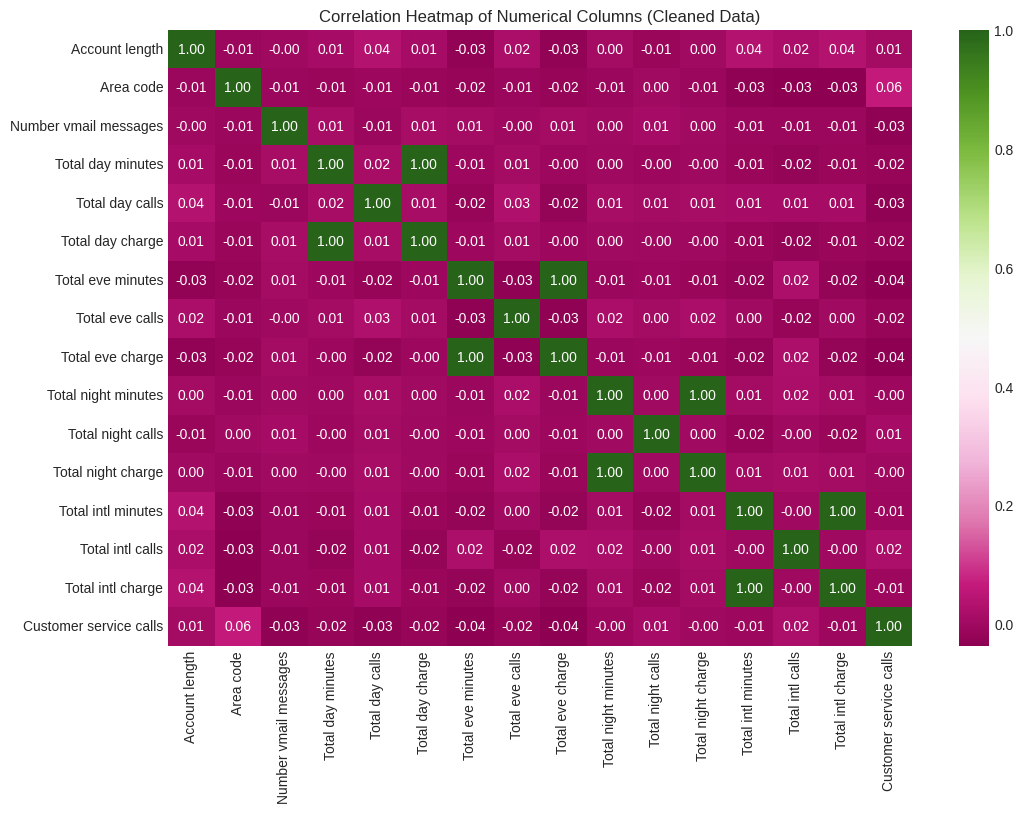

In [ ]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-v0_8-darkgrid')
correlation_matrix_cleaned = data_cleaned[numerical_cols_cleaned].corr()
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns (Cleaned Data)')
plt.show()

This heatmap visualizes the correlation matrix of the numerical columns in the cleaned dataset.

*   Each cell in the heatmap represents the correlation coefficient between two numerical features.
*   The color intensity and the value in each cell indicate the strength and direction of the linear relationship between the two variables.
*   Positive values indicate a positive correlation (as one variable increases, the other tends to increase), while negative values indicate a negative correlation (as one variable increases, the other tends to decrease).
*   Values close to 1 or -1 indicate a strong linear relationship, while values close to 0 indicate a weak or no linear relationship.
*   This plot helps to identify features that are highly correlated with each other, which can be useful for feature selection or understanding the relationships between variables.

**6.   List item**




Generating Pairplot for Subset of Numerical Features by Churn (Cleaned Data)...


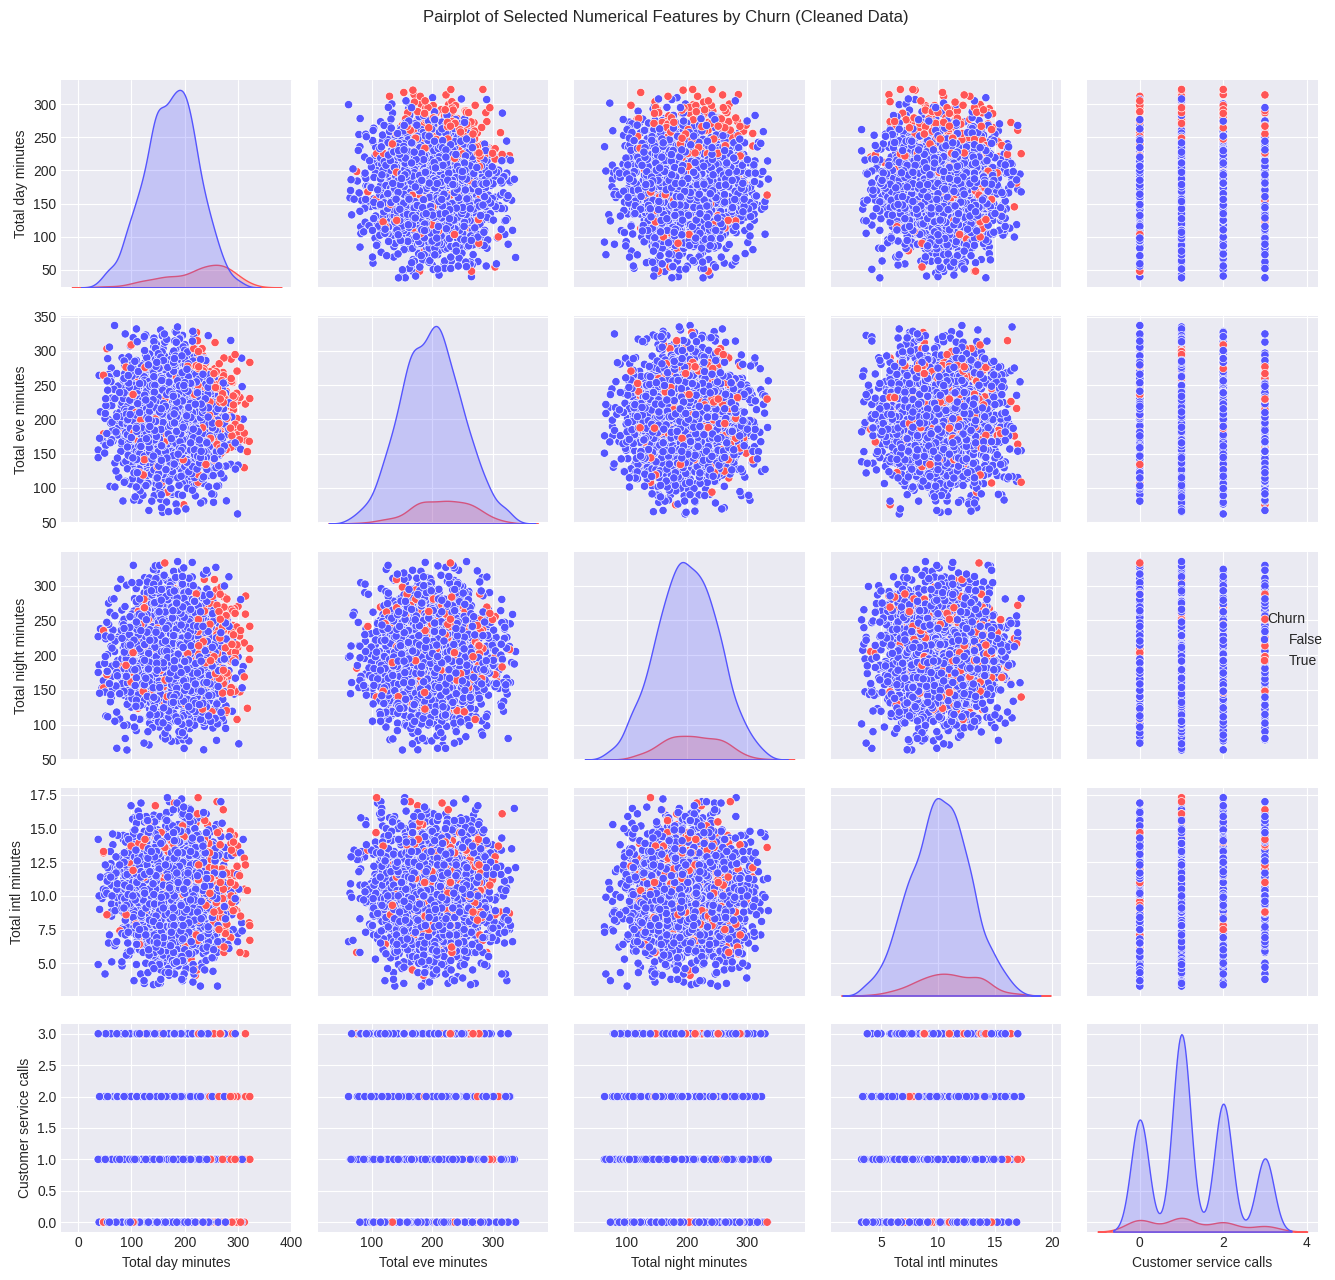

In [ ]:
print("Generating Pairplot for Subset of Numerical Features by Churn (Cleaned Data)...")
subset_numerical_cols = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes', 'Customer service calls', 'Churn']
plt.style.use('seaborn-v0_8-darkgrid')
sns.pairplot(data_cleaned[subset_numerical_cols], hue='Churn', diag_kind='kde', palette='seismic')
plt.suptitle('Pairplot of Selected Numerical Features by Churn (Cleaned Data)', y=1.02)
plt.tight_layout()
plt.show()

This pairplot visualizes the relationships between selected numerical features, colored by the 'Churn' status, in the cleaned dataset.

* **Scatter Plots**: The scatter plots in the off-diagonal panels show the pairwise relationships between each pair of selected numerical features. The color of each point indicates whether the customer churned (True) or not (False). These plots help to identify potential linear or non-linear relationships and how they differ between churned and non-churned customers.
* **Kernel Density Estimates (KDE)**: The diagonal panels show the kernel density estimates for each selected numerical feature, separated by 'Churn' status. These plots provide a smoothed representation of the distribution of each feature for churned and non-churned customers, highlighting differences in their distributions.
* **Insights**: By examining the scatter plots and KDEs, we can gain insights into which numerical features might be important predictors of churn and how their distributions differ between the two churn groups. For example, if the distributions or relationships between features are noticeably different for churned vs. non-churned customers, these features could be valuable for building a churn prediction model.

**7.    Violin plot for a selection of numerical features grouped by Churn**



Generating Violin Plots for Selected Numerical Features by Churn (Cleaned Data)...


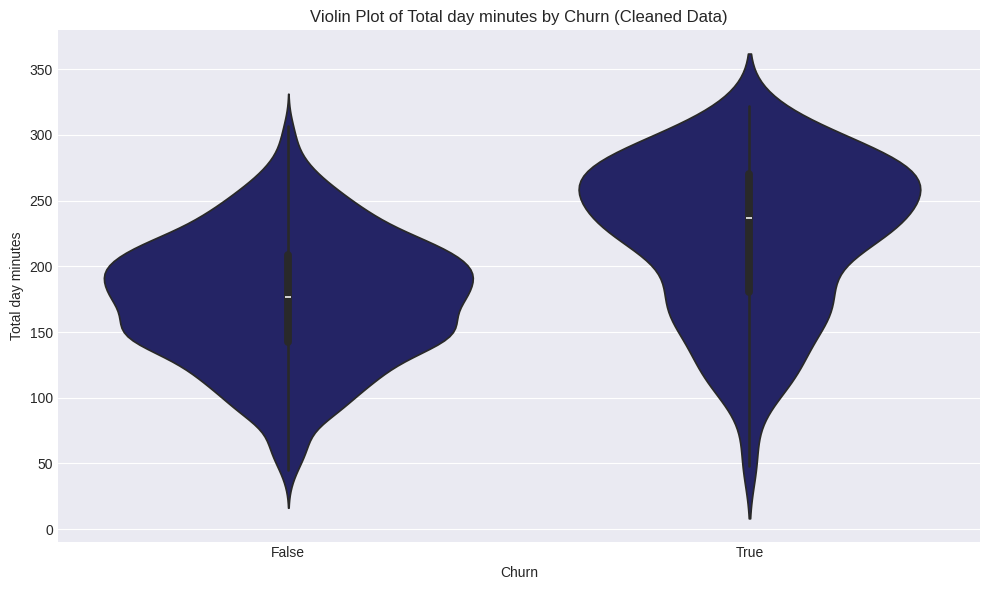

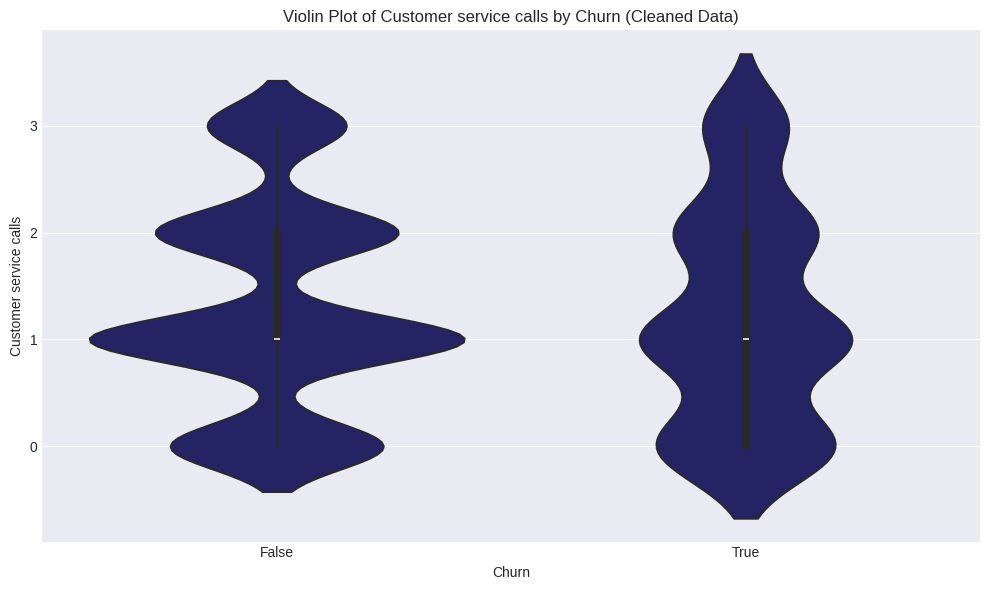

In [ ]:
print("Generating Violin Plots for Selected Numerical Features by Churn (Cleaned Data)...")
selected_numerical_cols_violin = ['Total day minutes', 'Customer service calls']
for col in selected_numerical_cols_violin:
    plt.figure(figsize=(10, 6))
    plt.style.use('seaborn-v0_8-darkgrid')
    sns.violinplot(data=data_cleaned, x='Churn',color='midnightblue', y=col)
    plt.title(f'Violin Plot of {col} by Churn (Cleaned Data)')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

These violin plots visualize the distribution of selected numerical features ('Total day minutes' and 'Customer service calls') for churned and non-churned customers in the cleaned dataset.

* **Shape of the Violin**: The width of the violin at a particular value indicates the density of data points at that value. A wider section means more data points are concentrated there.
* **Box Plot inside**: The white dot inside the violin represents the median, the thick bar represents the interquartile range (IQR), and the thin line extends to the upper and lower adjacent values (within 1.5 times the IQR).
* **Comparison of Distributions**: By comparing the shape and spread of the violin plots for 'False' (non-churned) and 'True' (churned) customers, we can observe how the distributions of these numerical features differ between the two groups.
* **Insights**: These plots help to visually assess whether there are significant differences in the distribution of 'Total day minutes' and 'Customer service calls' between customers who churn and those who don't, which can indicate their importance in predicting churn.

**8.   Stacked bar plot for International plan and Churn**




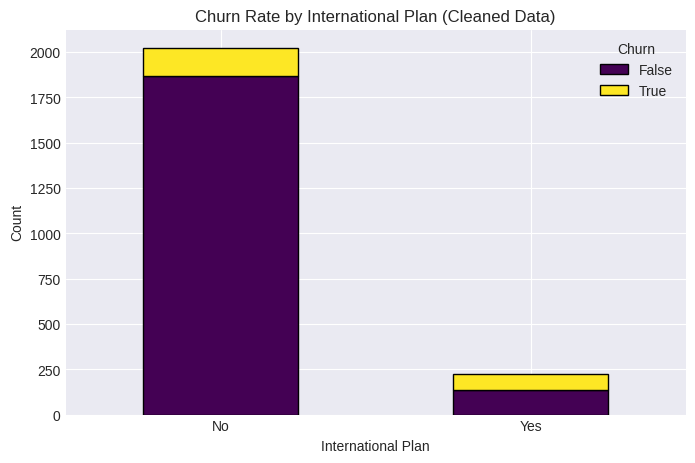

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
churn_intl_plan_cleaned = data_cleaned.groupby(['International plan', 'Churn']).size().unstack()
churn_intl_plan_cleaned.plot(kind='bar', stacked=True, figsize=(8, 5), cmap='viridis', edgecolor='black')
plt.title('Churn Rate by International Plan (Cleaned Data)')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

This stacked bar plot visualizes the churn rate based on whether customers have an international plan.

* **Bars**: Each bar represents a category within the 'International plan' feature ('No' and 'Yes').
* **Stacked Segments**: Within each bar, the segments are stacked to show the proportion of customers who churned (True) and did not churn (False) for that category.
* **Comparison**: By comparing the height of the 'True' segments across the bars, we can see how having an international plan affects the churn rate.
* **Insights**: This plot helps to determine if customers with an international plan are more or less likely to churn compared to those without one.

**9.   Stacked bar plot for Voice mail plan and Churn**



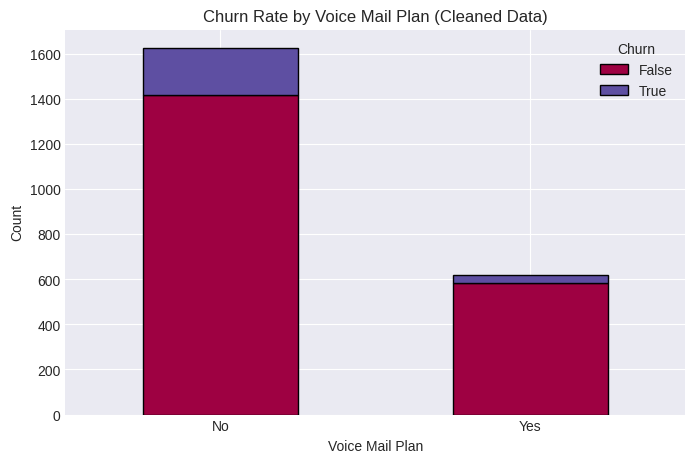

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
churn_vmail_plan_cleaned = data_cleaned.groupby(['Voice mail plan', 'Churn']).size().unstack()
churn_vmail_plan_cleaned.plot(kind='bar', stacked=True, figsize=(8, 5), cmap='Spectral', edgecolor='black')
plt.title('Churn Rate by Voice Mail Plan (Cleaned Data)')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

This stacked bar plot visualizes the churn rate based on whether customers have a voice mail plan.

*   **Bars**: Each bar represents a category within the 'Voice mail plan' feature ('No' and 'Yes').
*   **Stacked Segments**: Within each bar, the segments are stacked to show the proportion of customers who churned (True) and did not churn (False) for that category.
*   **Comparison**: By comparing the height of the 'True' segments across the bars, we can see how having a voice mail plan affects the churn rate.
*   **Insights**: This plot helps to determine if customers with a voice mail plan are more or less likely to churn compared to those without one.

##**Data Pre-Processing**##

In [ ]:
scaler = StandardScaler()
data_cleaned[numerical_cols_cleaned] = scaler.fit_transform(data_cleaned[numerical_cols_cleaned])

print("\nScaled Numerical Features (first 5 rows):")
display(data_cleaned[numerical_cols_cleaned].head())


Scaled Numerical Features (first 5 rows):


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.714450,-0.524248,1.536390,1.621673,0.502728,1.622375,-0.065979,-0.048268,-0.065129,0.882722,-0.475899,0.883193,-0.111647,-0.514763,-0.111821,-0.314728
1,0.177014,-0.524248,1.561305,-0.350402,1.179757,-0.350438,-0.104321,0.156471,-0.103098,1.079788,0.162422,1.081773,1.318832,-0.514763,1.320866,-0.314728
2,0.944780,-0.524248,-0.614560,1.208204,0.711045,1.208757,-1.603719,0.514765,-1.602854,-0.785224,0.215616,-0.782175,0.738908,0.510182,0.733464,-1.339189
3,-0.411606,-0.707266,-0.614560,2.275221,-1.528358,2.275870,-2.800411,-0.611300,-2.798862,-0.088384,-0.582286,-0.087143,-1.426141,1.237392,-1.429893,0.709734
4,-0.641935,-0.524248,-0.614560,-0.253227,0.658966,-0.252918,-1.056832,1.128982,-1.054684,-0.291544,1.119905,-0.290237,-0.072985,-0.514763,-0.068840,1.734195


## Feature engineering


In [ ]:
data_cleaned['Total day usage'] = data_cleaned['Total day minutes'] + data_cleaned['Total day calls']
data_cleaned['Total eve usage'] = data_cleaned['Total eve minutes'] + data_cleaned['Total eve calls']
data_cleaned['Total night usage'] = data_cleaned['Total night minutes'] + data_cleaned['Total night calls']
data_cleaned['Total intl usage'] = data_cleaned['Total intl minutes'] + data_cleaned['Total intl calls']
data_cleaned['Total charge'] = data_cleaned['Total day charge'] + data_cleaned['Total eve charge'] + data_cleaned['Total night charge'] + data_cleaned['Total intl charge']
data_cleaned['Total calls'] = data_cleaned['Total day calls'] + data_cleaned['Total eve calls'] + data_cleaned['Total night calls'] + data_cleaned['Total intl calls']
data_cleaned['Total minutes'] = data_cleaned['Total day minutes'] + data_cleaned['Total eve minutes'] + data_cleaned['Total night minutes'] + data_cleaned['Total intl minutes']

display(data_cleaned.head())

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total intl charge,Customer service calls,Churn,Total day usage,Total eve usage,Total night usage,Total intl usage,Total charge,Total calls,Total minutes
0,KS,0.714450,-0.524248,No,Yes,1.536390,1.621673,0.502728,1.622375,-0.065979,...,-0.111821,-0.314728,False,2.124402,-0.114246,0.406823,-0.626410,2.328618,-0.536202,2.326770
1,OH,0.177014,-0.524248,No,Yes,1.561305,-0.350402,1.179757,-0.350438,-0.104321,...,1.320866,-0.314728,False,0.829355,0.052150,1.242210,0.804069,1.949103,0.983888,1.943897
2,NJ,0.944780,-0.524248,No,No,-0.614560,1.208204,0.711045,1.208757,-1.603719,...,0.733464,-1.339189,False,1.919249,-1.088954,-0.569608,1.249090,-0.442808,1.951608,-0.441830
3,OH,-0.411606,-0.707266,Yes,No,-0.614560,2.275221,-1.528358,2.275870,-2.800411,...,-1.429893,0.709734,False,0.746863,-3.411712,-0.670670,-0.188749,-2.040028,-1.484552,-2.039715
4,OK,-0.641935,-0.524248,Yes,No,-0.614560,-0.253227,0.658966,-0.252918,-1.056832,...,-0.068840,1.734195,False,0.405738,0.072150,0.828361,-0.587749,-1.666679,2.393089,-1.674589


## Feature selection



In [ ]:
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

In [ ]:
churn_correlation = X.corrwith(y).abs().sort_values(ascending=False)
print("Correlation with Churn:")
print(churn_correlation)

Correlation with Churn:
International plan_Yes    0.307853
Total day charge          0.290936
Total day minutes         0.290818
Total minutes             0.282317
Total charge              0.281959
                            ...   
State_WY                  0.003963
State_NY                  0.001221
State_KY                  0.000588
State_NE                  0.000588
State_CO                  0.000385
Length: 75, dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nFeature Importances from RandomForestClassifier:")
print(feature_importances)


Feature Importances from RandomForestClassifier:
Total day charge          0.099464
Total day minutes         0.095275
International plan_Yes    0.074166
Total charge              0.062841
Total minutes             0.059885
                            ...   
State_GA                  0.000383
State_RI                  0.000294
State_HI                  0.000196
State_IA                  0.000187
State_OR                  0.000148
Length: 75, dtype: float64


In [ ]:
importance_threshold = 0.01
selected_features = feature_importances[feature_importances > importance_threshold].index.tolist()
X = X[selected_features]

print("\nSelected Features (importance > 0.01):")
print(selected_features)


Selected Features (importance > 0.01):
['Total day charge', 'Total day minutes', 'International plan_Yes', 'Total charge', 'Total minutes', 'Total day usage', 'Total intl charge', 'Total intl calls', 'Total intl minutes', 'Total eve minutes', 'Total eve charge', 'Total calls', 'Total intl usage', 'Number vmail messages', 'Total night charge', 'Total night usage', 'Total night minutes', 'Total eve usage', 'Account length', 'Total day calls', 'Total night calls', 'Total eve calls', 'Voice mail plan_Yes', 'Customer service calls']


## Data splitting


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Building and Evaluation



Lets perform model building using below models to calculate the score


*   Logistic Regression
*   Decision Tree
*   Random Forest
*   SVC
*   Naive Bayes
*   XGBoost






In [ ]:
# Import the required libraries and models used for Classification tasks:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Initialize an empty dictionary to store the results
results = {}

# Iterate through classifiers
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Store the results
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T
results_df


,Accuracy,F1 Score
Logistic Regression,0.909253,0.400000
K-Nearest Neighbors,0.923488,0.469136
Decision Tree,0.937722,0.695652
Random Forest,0.953737,0.723404
Support Vector Classifier,0.923488,0.469136
Naive Bayes,0.877224,0.566038
XGBoost,0.966192,0.819048


XGBoost Classifier is the best performing classifier model with highest Accuracy (96.61%) & highest F1 score (81.90%)